In [1]:
print('Hello')

Hello


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

data=datasets.fetch_openml('mnist_784',version=1,return_X_y=True)

In [4]:
pixel_values,targets=data


In [5]:
targets=targets.astype(int)

In [9]:
targets[1:10,]


array([0, 4, 1, 9, 2, 1, 3, 1, 4])

In [16]:
pixel_values[1:10,]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
data1=datasets.fetch_openml('mnist_784',version=1)

In [19]:
pixel_values.shape

(70000, 784)

In [22]:
single_image=pixel_values[2, :].reshape(28,28)

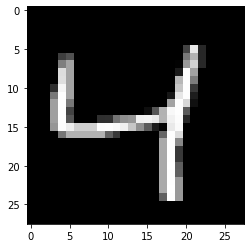

In [25]:
plt.imshow(single_image,cmap='gray')

In [29]:
tsne=manifold.TSNE(n_components=2,random_state=42)
transformed_data=tsne.fit_transform(pixel_values[:3000,:])

In [30]:
tsne_df=pd.DataFrame(np.column_stack((transformed_data,targets[:3000])),columns=["x","y","targets"])

tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)

In [31]:
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9


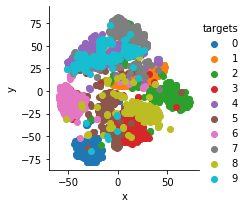

In [35]:
grid=sns.FacetGrid(tsne_df,hue="targets")
grid.map(plt.scatter,"x","y").add_legend()

In [ ]:
# https://towardsdatascience.com/t-sne-python-example-1ded9953f26 